### Initialization

In [2]:
# import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [228]:
# constants
R = 0.99
d = 1.51 *0.01 # m
Δd = 0.01 *0.01 # m
F = 30.0 *0.01 # m
ΔF = 0.5 *0.01 # m
c = 3.00 *10**8 # m/s
e = 1.602 * 10**-19 # C
m_e = 9.109 * 10**-31 # kg
h = 6.626 * 10**-34 # Js
# μ_B = e * h / (4 * np.pi * m_e) # J/T
# Mit der Formel bekommst du einen Rundungsfehler
μ_B = 9.274 * 10**-24 # J/T
λ_Cd = 643.85 *10**-9 # m
λ_Zn = 636.24 *10**-9 # m

In [25]:
# measured data

path = 'Data/'

#1
input = path+'1.txt'
data_1 = [[],[]]
count = 0
for line in open(input):
    if count < 26:
        data_1[0].append(np.float(line.split()[1]))
        count = count + 1
    else:
        data_1[1].append(np.float(line.split()[1]))

# data_1[0] = hoch, data_1[1] = runter
data_1 = np.array([data_1[0],data_1[1][::-1]]) * 0.001 # T
Δdata_1 = 3 *0.001 # T
I_1 = 2*np.array([range(26),range(26)]) # A
ΔI_1 = 1 # A

#4
data_4 = [[],[]]
rings_4 = [[],[]]

# Zn
input = path+'4_Zn.txt'
for line in open(input):
    rings_4[0].append(np.float(line.split()[0]))
    data_4[0].append(np.float(line.split()[1]))

# Cd
input = path+'4_Cd.txt'
for line in open(input):
    rings_4[1].append(np.float(line.split()[0]))
    data_4[1].append(np.float(line.split()[1]))

# data_4[0] = Zn, data_4[1] = Cd
data_4 = [np.array(data_4[0]) *0.001,np.array(data_4[1]) *0.001] # m
Δdata_4 = 0.1 *0.001 # m
rings_4 = np.array(rings_4)

#6
I_6 = np.array([9,19,32]) # A
ΔI_6 = 1 # A
split_6 = ['1/4','1/2','3/4']

#7
I_7 = I_6[0] # A
ΔI_7 = ΔI_6 # A
data_7 = [[],[]]
rings_7 = [[],[]]

input = path+'7.txt'
count = 0
for line in open(input):
    if (0 == count or 7 == count):
        pass
    else:
        if count < 7:
            rings_7[0].append(np.float(line.split()[0]))
            data_7[0].append(np.float(line.split()[1]))
        else:
            rings_7[1].append(np.float(line.split()[0]))
            data_7[1].append(np.float(line.split()[1]))

# data_7[0] = polarisation up, data_7[1] = polarisation right
data_7 = np.array(data_7) *0.001 # m
Δdata_7 = 0.1 *0.001 # m
rings_7 = np.array(rings_7)

#8
I_8 = 5 # A
ΔI_8 = 1 # A

In [6]:
# theoretical functions
f_lin = lambda x,a,b: a+b*x

### Task 1

In [212]:
# calculations

# Achtung opt_i kommen später
def m(I):
    I = np.array(I)
    arr = np.array([])
    for i in I:
        if i < 23:
            arr = np.append(arr,opt_2[0])
        elif i < 36:
            arr = np.append(arr,opt_3[0])
        else:
            arr = np.append(arr,opt_4[0])
    return arr * 0.001

def B(I):
    I = np.array(I)
    arr = np.array([])
    for i in I:
        arr = np.append(arr,(data_1[0][np.floor(i/2)] + data_1[0][np.ceil(i/2)]) / 2)
    return arr
        
def ΔB(I):
    return np.sqrt((Δdata_1)**2 + 2*(m(I) * ΔI_1)**2)

# Fehlerrechnung mit Hilfe von Polynomfit für den Weg hoch
#fun = lambda x,*a: sum([a[i]*x**i for i in range(len(a))])
#opt_1,cov_1 =curve_fit(fun,I_1[0],data_1[0],p0=(1,1,1,1),sigma=Δdata_1,absolute_sigma=True)
#Δopt_1 = np.sqrt(np.diag(cov_1))
#def B(I):
#    return fun(I,*opt_1)


#def ΔB(I):
#    
#    sum1 = 0
#    i = 0
#    for a in Δopt_1:
#        sum1 += (a * I**i)**2
#        i += 1
#    sum2 = 0
#    i = 0
#    for a in opt_1:
#        if i > 0:
#            sum2 += i * a * I**(i-1)
#        i += 1
#    return np.sqrt(sum1 + 27/26* (ΔI_1 * sum2 )**2)

In [205]:
m([1,4,6,8,23,35,26,49])

array([ 19.21153846,  19.21153846,  19.21153846,  19.21153846,
        10.32857142,  10.32857142,  10.32857142,   5.60119048])

In [195]:
#B_2 = []
#ΔB_2 = []
#for i in range(51):
#    B_2.append(B(i))
#    ΔB_2.append(ΔB(i))
#plt.plot(B_2)
#plt.plot(ΔB_2)
#plt.plot(range(0,51,2),data_1[0])
#print(opt_1)

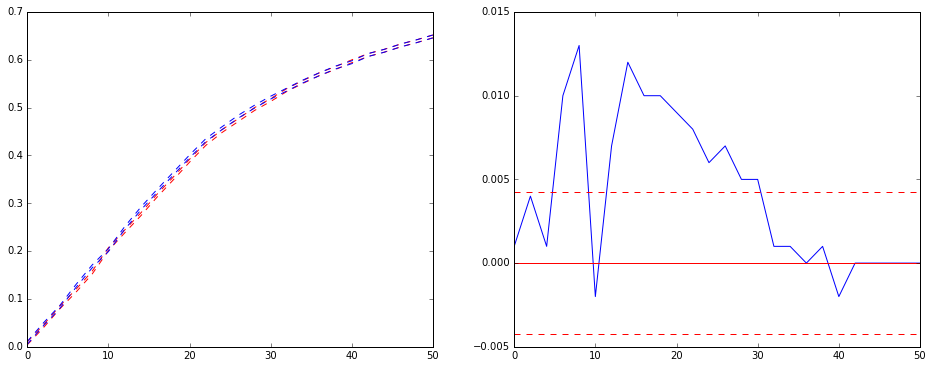

In [5]:
# plots
fig,ax = plt.subplots(1,2,figsize=(16,6))

#ax[0].errorbar(I_1[0],data_1[0],xerr=ΔI_1,yerr=Δdata_1,fmt='.',c='r')
ax[0].plot(I_1[0],data_1[0]+Δdata_1,'--r')
ax[0].plot(I_1[0],data_1[0]-Δdata_1,'--r')
#ax[0].errorbar(I_1[1],data_1[1],xerr=ΔI_1,yerr=Δdata_1,fmt='.',c='b')
ax[0].plot(I_1[1],data_1[1]+Δdata_1,'--b')
ax[0].plot(I_1[1],data_1[1]-Δdata_1,'--b')

ax[1].plot(I_1[0],data_1[1]-data_1[0])
ax[1].axhline(0,c='r')
ax[1].plot([0,50],2*[np.sqrt(2)*Δdata_1],'--r')
ax[1].plot([0,50],2*[-np.sqrt(2)*Δdata_1],'--r')

###### # conclusion
Hysterese ist angedeutet, allerdings sehr schwach ausgeprägt. Ab sofort wird die erste Datenreihe verwendet, da vor jeder messung der strom minimal ist.

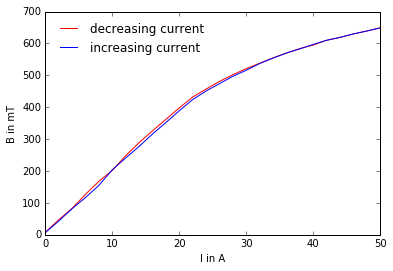

In [115]:
# plot
fig,ax = plt.subplots(figsize=(6,4))

ax.plot(I_1[1],data_1[1]*1000,label='decreasing current',c='r')
ax.plot(I_1[0],data_1[0]*1000,label='increasing current',c='b')
ax.legend(loc=0,frameon=False)
ax.set_xlabel('I in A')
ax.set_ylabel('B in mT')
#fig.savefig('cal_1.pdf')

C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


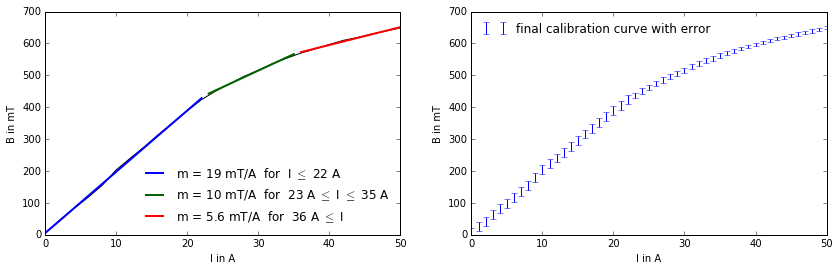

In [224]:
# plot
fig,ax = plt.subplots(1,2,figsize=(14,4))

a1 = 12
a2 = 18

lin = lambda x,m,b: m*np.array(x) + b
opt_2,cov_2 = curve_fit(lin,I_1[0][:a1],data_1[0][:a1]*1000)
opt_3,cov_3 = curve_fit(lin,I_1[0][a1:a2],data_1[0][a1:a2]*1000)
opt_4,cov_4 = curve_fit(lin,I_1[0][a2:],data_1[0][a2:]*1000)

#ax.scatter(I_1[0][[a1-1,a2-1]],data_1[0][[a1-1,a2-1]]*1000)
ax[0].plot(I_1[0],data_1[0]*1000,c='k')
ax[0].plot(range(I_1[0][a1]-1),lin(range(I_1[0][a1]-1),*opt_2),lw=2,label='m = %0.f mT/A  for  I $\leq$ %d A'%(opt_2[0],I_1[0][a1-1]))
ax[0].plot(range(I_1[0][a1]-1,I_1[0][a2]),lin(range(I_1[0][a1]-1,I_1[0][a2]),*opt_3),lw=2,c='darkgreen',label='m = %0.f mT/A  for  %d A $\leq$ I $\leq$ %d A'%(opt_3[0],I_1[0][a1]-1,I_1[0][a2-1]+1))
ax[0].plot(range(I_1[0][a2],I_1[0][-1]+1),lin(range(I_1[0][a2],I_1[0][-1]+1),*opt_4),c='r',lw=2,label='m = %0.1f mT/A  for  %d A $\leq$ I'%(opt_4[0],I_1[0][a2]))

ax[0].legend(loc=0,frameon=False)
ax[0].set_xlabel('I in A')
ax[0].set_ylabel('B in mT')

ax[1].errorbar(range(51),1000*B(range(51)),yerr=1000*ΔB(range(51)),label='final calibration curve with error',fmt='None',c='b')
ax[1].legend(loc=0,frameon=False)
ax[1].set_xlabel('I in A')
ax[1].set_ylabel('B in mT')
ax[1].set_ylim(0,700)

#fig.savefig('cal_2.pdf')

C:\Users\Niklas\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<Container object of 3 artists>

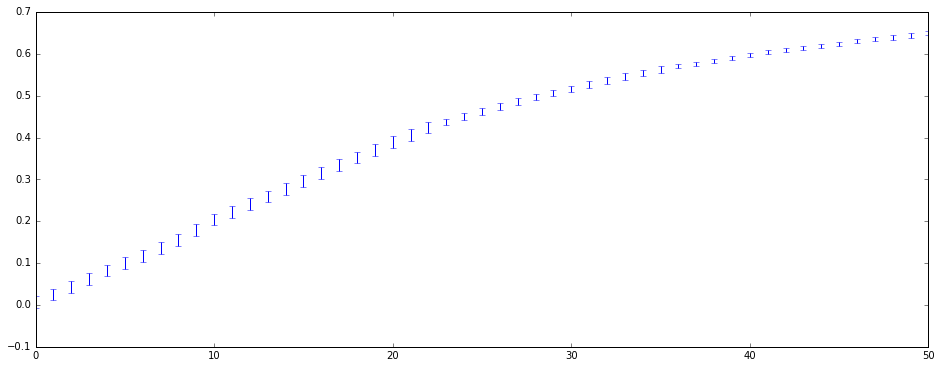

In [214]:
fig,ax = plt.subplots(1,1,figsize=(16,6))

ax.errorbar(range(51),B(range(51)),yerr=ΔB(range(51)),fmt='None',c='b')

[  6.39506945e-03   1.72433336e-02   3.76274460e-04  -1.78058756e-05
   1.70898078e-07]
[  2.37582873e-03   6.86087054e-04   5.74378880e-05   1.74249788e-06
   1.72807517e-08]
[  7.37149446e-03   1.83232573e-02   3.40181682e-04  -1.79529147e-05
   1.79649549e-07]
[  2.37582853e-03   6.86086891e-04   5.74378716e-05   1.74249731e-06
   1.72807455e-08]


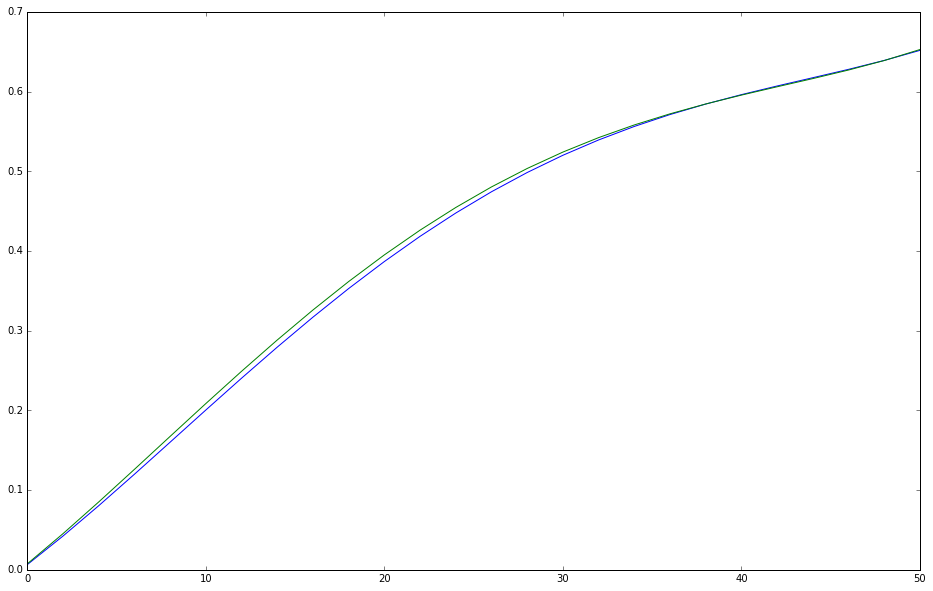

In [7]:
fig,ax = plt.subplots(1,1,figsize=(16,10))
fun = lambda x,*a: sum([a[i]*x**i for i in range(len(a))])
opt,cov =curve_fit(fun,I_1[0],data_1[0],p0=(1,1,1,1,1),sigma=Δdata_1,absolute_sigma=True)
#ax[0].errorbar(I_1[0],data_1[0],xerr=ΔI_1,yerr=Δdata_1,fmt='.',c='r')
#ax.plot(I_1[0],data_1[0],'-b')
ax.plot(I_1[0],fun(I_1[0],*opt))
print(opt,np.sqrt(np.diag(cov)),sep='\n')
#ax.plot(I_1[0],data_1[0]-Δdata_1,'--r')
opt1,cov1 =curve_fit(fun,I_1[1],data_1[1],p0=(1,1,1,1,1),sigma=Δdata_1,absolute_sigma=True)
#ax[0].errorbar(I_1[0],data_1[0],xerr=ΔI_1,yerr=Δdata_1,fmt='.',c='r')
#ax.plot(I_1[1],data_1[1],'-r')
ax.plot(I_1[1],fun(I_1[1],*opt1))
print(opt1,np.sqrt(np.diag(cov1)),sep='\n')

### Task 2

In [9]:
# calculations
None

In [10]:
# plots
None

###### # conclusion
None

### Task 3

In [11]:
# calculations
None

In [12]:
# plots
None

###### # conclusion
None

### Task 4

In [267]:
# calculations

o_4 = [[],[]]
Δo_4 = [[],[]]
r_4 = [[],[]]
Δr_4 = [[],[]]
b_4 = [[],[]]
Δb_4 = [[],[]]

# Zn
# Bestimmung des Nullpunkts
o_4[0] = (sum(data_4[0][0:3]+data_4[0][6:3:-1])/2+data_4[0][3])/4
Δo_4[0] = np.sqrt(6*(Δdata_4/8)**2 + (Δdata_4/4)**2)
r_4[0] = o_4[0] - data_4[0][4:]
Δr_4[0] = np.sqrt(Δo_4[0]**2 + Δdata_4**2)

# linear fit
opt_Zn, cov_Zn = curve_fit(f_lin, np.linspace(1,10,10), r_4[0]**2,sigma=2* r_4[0]*Δr_4[0],absolute_sigma=True)
b_4[0] = opt_Zn[1]
Δb_4[0] = np.sqrt(np.diag(cov_Zn)[1])

# Cd
# Bestimmung des Nullpunkts
o_4[1] = (sum(data_4[1][0:3]+data_4[1][5:2:-1])/2)/3
Δo_4[1] = np.sqrt(6*(Δdata_4/6)**2)
r_4[1] = o_4[1] - data_4[1][3:]
Δr_4[1] = np.sqrt(Δo_4[1]**2 + Δdata_4**2)

# linear fit
opt_Cd, cov_Cd = curve_fit(f_lin, np.linspace(1,10,10), r_4[1]**2,sigma=2* r_4[1]*Δr_4[1],absolute_sigma=True)
b_4[1] = opt_Cd[1]
Δb_4[1] = np.sqrt(np.diag(cov_Cd)[1])

In [266]:
(data_4[0][0:3]+data_4[0][6:3:-1])/2
data_4[0][3]

0.0011999999999999999

0 von Zn: 0.00104375 +- 3.95284707521e-05 
 0 von Cd: 0.001245 +- 4.08248290464e-05
wavelengths: 5.73982084269e-07 1.44112973203e-08 6.19039965485e-07 1.38169646139e-08


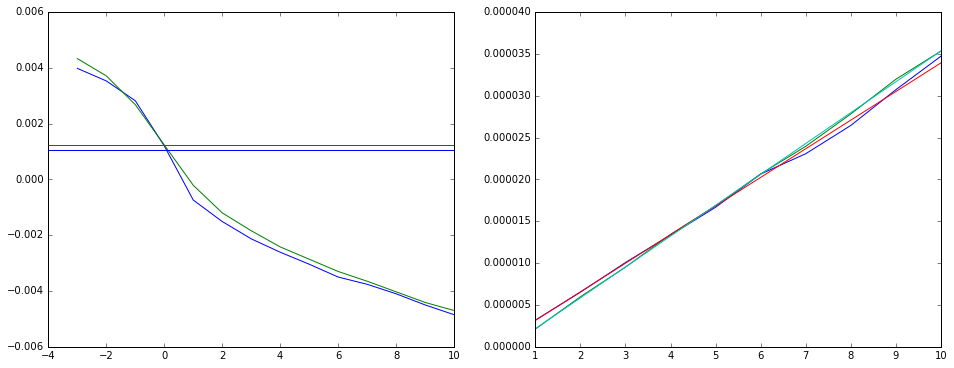

In [268]:
# plots
fig,ax = plt.subplots(1,2,figsize=(16,6))

ax[0].plot(rings_4[0],data_4[0],'-b')
ax[0].plot(rings_4[1],data_4[1],'-g')
ax[0].axhline(o_4[0],c='b')
ax[0].axhline(o_4[1],c='g')
ax[1].plot(range(1,11),r_4[0]**2)
ax[1].plot(range(1,11),r_4[1]**2)

x = np.linspace(1,10,50)
ax[1].plot(x,f_lin(x,*opt_Zn))
ax[1].plot(x,f_lin(x,*opt_Cd))
λ_Zn4 = b_4[0]*d/F**2
Δλ_Zn4 = Δb_4[0]*d/F**2
λ_Cd4 = b_4[1]*d/F**2
Δλ_Cd4 = Δb_4[1]*d/F**2
print('0 von Zn:',o_4[0],'+-',Δo_4[0],'\n','0 von Cd:',o_4[1],'+-',Δo_4[1])
print('wavelengths:',λ_Zn4,Δλ_Zn4,λ_Cd4,Δλ_Cd4)

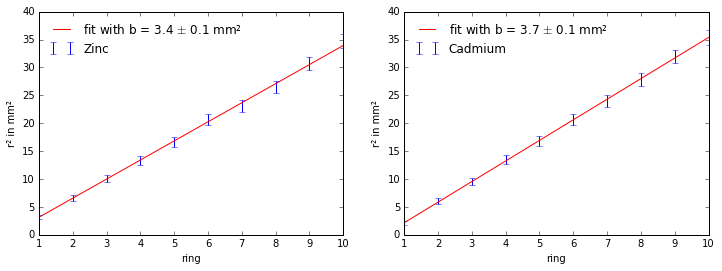

In [277]:
# plot
fig,ax = plt.subplots(1,2,figsize=(12,4))

rg =np.array(range(1,11))
ax[0].plot(rg,f_lin(rg,*opt_Zn)*1000**2,c='r',label='fit with b = %0.1f $\pm$ %0.1f mm²'%(b_4[0]*10**6,Δb_4[0]*10**6))
ax[0].errorbar(rg,(r_4[0]*1000)**2,yerr=2* r_4[0]*Δr_4[0]*10**6,fmt='None',label='Zinc',c='b')
ax[1].plot(rg,f_lin(rg,*opt_Cd)*1000**2,c='r',label='fit with b = %0.1f $\pm$ %0.1f mm²'%(b_4[1]*10**6,Δb_4[1]*10**6))
ax[1].errorbar(rg,(r_4[1]*1000)**2,yerr=2* r_4[1]*Δr_4[1]*10**6,fmt='None',label='Cadmium',c='b')
ax[0].legend(loc=0,frameon=False)
ax[0].set_xlabel('ring')
ax[0].set_ylabel('r² in mm²')
ax[1].legend(loc=0,frameon=False)
ax[1].set_xlabel('ring')
ax[1].set_ylabel('r² in mm²')
#fig.savefig('t4_fit.pdf')

###### # conclusion
Fehler müssen noch ordentlich gemacht werden, scheinen aber recht groß zu sein, dementsprechend die Werte vermutlich noch akzeptabel.

### Task 5

In [15]:
# calculations
None

In [16]:
# plots
None

###### # conclusion
None

### Task 6

In [17]:
# calculations

# Rechne I in B um über Mittelung der zwei umliegenden Werte, falls nötig
# verwende aufsteigenden Teil der Hysterese
B_6 = (data_1[0][np.floor(I_6/2).astype(np.int64)] + data_1[0][np.ceil(I_6/2).astype(np.int64)])/2
#ΔB_6

In [18]:
# plots


###### # conclusion
Eine Tabelle müsste gemacht werden.

### Task 7

In [20]:
# calculations


In [6]:
# plots


###### # conclusion


### Task 8

In [34]:
# calculations

# theoretical resolving capacity
rc_t = np.pi * d / λ_Cd *2* np.sqrt(R)/(1-R)

# measured resolving capacity
# Hysterese aufwärts
B_8 = (data_1[0][np.floor(I_8/2).astype(np.int64)] + data_1[0][np.ceil(I_8/2).astype(np.int64)])/2
#ΔB_8
dE = μ_B * B_8
dλ_p = h * c /(h * c / λ_Cd - dE)
dλ_m = h * c /(h * c / λ_Cd + dE)
rc_m = λ_Cd / (dλ_p-dλ_m)

print(rc_t,rc_m,sep='\n')

14661881.7627
167289.166858


In [35]:
# plots


###### # conclusion
Vielleicht ist irgendwo ne Zehnerpotenz falsch...

### Task 9

In [5]:
# calculations


In [6]:
# plots


###### # conclusion
